In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/zerobase/MyPJ/PJ06')
os.getcwd()

'/content/drive/MyDrive/zerobase/MyPJ/PJ06'

In [ ]:
import pandas as pd
df = pd.read_csv('P_PJT06_DATA.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **Dataset Overview and Preprocessing**  

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


🔽 Time Span of Invoice Dates

In [ ]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


>✅ Purchase data spanning approximately one year

🔽 Countries Represented in the Data

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df['Country'].nunique()

38

In [ ]:
(df['Country']=='Unspecified').sum()

446

In [ ]:
a = (df['Country']=='Unspecified').sum()
b = df.shape[0]
print(a)
print(b)
print(a/b)

446
541909
0.0008230164105043466


>✅ The dataset includes data from 37 countries (out of 38 unique values, one is labeled as 'Unspecified').\
✅ There are 446 entries with an unidentified country, accounting for less than 0.1% of the data. ➡ Given the minimal proportion, these records were retained for analysis.

🔽 Entries with Non-positive Quantity or Negative Unit Price

In [ ]:
(df['Quantity']<0).sum()

10624

In [ ]:
(df['Quantity']==0).sum()

0

In [ ]:
(df['UnitPrice']<0).sum()

2

In [ ]:
(df['UnitPrice']==0).sum()

2515

>✅ There are many entries where Quantity is less than 0, and many cases where UnitPrice is equal to 0. While a price of 0 may not be impossible—considering promotions or coupons—it is still worth verifying.\
✅ When inspecting the data in Excel, entries with UnitPrice = 0 often also lacked CustomerID.
➡ Since no clear method is available to recover missing CustomerID values, consider checking the proportion of records where CustomerID is null and either Quantity or Price is invalid. If the percentage is sufficiently small, removal may be a reasonable option.

🔽 CustomerID, Quantity, UnitPrice

In [ ]:
((df['CustomerID'].isnull())&(df['Quantity']<0)&(df['UnitPrice']<0)).sum()

0

In [ ]:
((df['CustomerID'].isnull())|(df['Quantity']<0)|(df['UnitPrice']<0)).sum()

143985

In [ ]:
df['CustomerID'].isnull().sum()

135080

In [ ]:
143985-135080

8905

In [ ]:
df.shape

(541909, 8)

In [ ]:
143985/541909

0.2656995916288528

> ✅ These records make up about 27% of the data — may be too large a portion to drop altogether.

In [ ]:
df['InvoiceNo'].str.contains('C', case=False).sum()

9288

In [ ]:
((df['InvoiceNo'].str.contains('C', case=False))&(df['Quantity']<0)).sum()

9288

In [ ]:
# Invoice Prefix Analysis for Quantity < 0

filtered_df = df[df['Quantity'] < 0]
first_chars = filtered_df['InvoiceNo'].astype(str).str[0]
unique_first_chars = first_chars.unique()
print(unique_first_chars)

['C' '5']


>✅ Based on the assumption that Quantity < 0 may indicate returns, the relationship between such records and invoice numbers starting with "C"—which are likely credit notes—was examined.\
✅ Not all records with Quantity < 0 start with "C", but all invoices starting with "C" are associated with Quantity < 0, suggesting a strong link to return transactions.

In [ ]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [ ]:
495478/541909

0.9143195628786382

> ✅ Data from the United Kingdom accounts for over 90% of the entire dataset.

In [ ]:
# Identifying countries with records where CustomerID is null or Quantity < 0 or UnitPrice < 0

filtered_df = df[(df['CustomerID'].isnull()) | (df['Quantity']<0) | (df['UnitPrice']<0)]
unique_countries = filtered_df['Country'].unique()
print(unique_countries)

['United Kingdom' 'Germany' 'EIRE' 'Italy' 'France' 'Australia' 'Sweden'
 'Portugal' 'Austria' 'Israel' 'Bahrain' 'Belgium' 'Spain' 'Japan'
 'Hong Kong' 'Channel Islands' 'Netherlands' 'Switzerland' 'Cyprus'
 'Norway' 'Saudi Arabia' 'Poland' 'Finland' 'Czech Republic' 'Singapore'
 'Unspecified' 'European Community' 'Malta' 'Greece' 'Denmark' 'USA']


> ✅ Problematic records are spread across multiple countries without clear concentration.

In [ ]:
## The operation takes too long to run, so it has been commented out.

# # Filter rows where 'InvoiceNo' contains the letter 'C'
# c_invoices = df[df['InvoiceNo'].str.contains('C', case=False)]

# # For each of these rows, check if there exists another row
# # with the same 'Description' and a 'Quantity' value that has the same absolute value but opposite sign
# matches = c_invoices.apply(lambda row:
#                            ((df['Quantity'] == -1 * row['Quantity']) &
#                             (df['Description'] == row['Description'])).any(),
#                            axis=1)

# # Count the number of True values
# num_matches = matches.sum()

# print(num_matches)

# Result: 8763

In [ ]:
8763/9288

0.9434754521963824

> ✅ For entries with invoice numbers starting with "C" (assumed to be returns), a check was performed to see whether each had a corresponding row with the same Description and a Quantity of equal magnitude but opposite sign ➡ to assess whether these can be considered true return cases.\
✅ The result showed that 8,763 such reversed rows exist, meaning not all "C" invoices (which always have Quantity < 0) have a matching counterpart.\
✅ Possibly, some of them are partial returns rather than full ones?

In [ ]:
## The operation takes too long to run, so it has been commented out.

# c_invoices = df[df['InvoiceNo'].str.contains('C', case=False)]

# # For each invoice with 'C' (assumed return),
# # check whether there exists a prior purchase of the same item (i.e., positive Quantity with matching Description)
# matches = c_invoices.apply(lambda row:
#                            ((df['Quantity'] > 0) &
#                             (df['Description'] == row['Description'])).any(),
#                            axis=1)

# # Count the number of True values
# num_matches = matches.sum()

# print(num_matches)

# Result: 9179

> ✅ To account for partial return cases, a check was performed to see whether each return (with negative Quantity) had a matching positive Quantity for the same item, even if the absolute values weren't equal. However, not all of the 9,288 suspected return entries had such counterparts.\
✅ Since this dataset only covers about one year, it's possible that the original purchases occurred before the recorded period.\
⬇\
✅ Manually handling these cases based on personal assumptions and logic would be too complicated and incomplete. Decided to simply remove all entries where CustomerID is null or Quantity < 0, or UnitPrice < 0.


🔽 Extracted a DataFrame after removing records with CustomerID = null, Quantity < 0, or UnitPrice < 0.

In [ ]:
cleaned_df = df[~((df['CustomerID'].isnull()) | (df['Quantity']<0) | (df['UnitPrice']<0))]

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
df.shape[0]-cleaned_df.shape[0]

143985

In [ ]:
(cleaned_df['UnitPrice']<0).sum()

0

In [ ]:
(cleaned_df['UnitPrice']==0).sum()

40

In [ ]:
(cleaned_df['Quantity']<0).sum()

0

In [ ]:
df_origin=df
df=cleaned_df

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


> ✅ Extracted cleaned_df by removing all rows where CustomerID is null or Quantity < 0, or UnitPrice < 0.\
✅ For convenience in later analysis, saved the original data as df_origin and reassigned cleaned_df to df.

## **Visualization and Cohort Analysis**

---
#### **Cohort Index Calculation**

In [ ]:
df['CustomerID'].nunique()

4339

In [ ]:
df['CustomerID'].nunique() / df.shape[0]

0.010904092238718952

In [ ]:
df['InvoiceNo'].nunique()

18536

> ✅ There are 4,339 unique CustomerIDs, which means that on average, each customer has around 100 purchase records.\
✅ There are 18,536 unique InvoiceNos, indicating that multiple items within the same invoice are recorded as separate rows.

In [ ]:
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [ ]:
print(df['YearMonth'].min())
print(df['YearMonth'].max())

2010-12
2011-12


In [ ]:
df['YearMonthOrder']=(df['InvoiceDate'].dt.year-2010)*12 + (df['InvoiceDate'].dt.month-12) +1

In [ ]:
df[['YearMonth','YearMonthOrder']].drop_duplicates()

,YearMonth,YearMonthOrder
0,2010-12,1
42481,2011-01,2
77628,2011-02,3
105335,2011-03,4
142083,2011-04,5
171999,2011-05,6
209029,2011-06,7
245903,2011-07,8
285421,2011-08,9
320705,2011-09,10


In [ ]:
df['CohortIndex'] = df.groupby('CustomerID')['YearMonthOrder'].min()

In [ ]:
df['CohortIndex'] = df.groupby('CustomerID')['YearMonthOrder'].transform('min')

In [ ]:
df[['CustomerID','CohortIndex']].drop_duplicates()

,CustomerID,CohortIndex
0,17850.0,1
9,13047.0,1
26,12583.0,1
46,13748.0,1
65,15100.0,1
...,...,...
536969,13436.0,13
537255,15520.0,13
538064,13298.0,13
538812,14569.0,13


In [ ]:
df[df['CustomerID']==13047]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,YearMonthOrder,CohortIndex
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12,1,1
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12,1,1
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12,1,1
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,2010-12,1,1
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,2010-12,1,1
...,...,...,...,...,...,...,...,...,...,...,...
397488,571185,23109,PACK OF SIX LED TEA LIGHTS,12,2011-10-14 11:15:00,2.89,13047.0,United Kingdom,2011-10,11,1
397489,571185,23434,3 RAFFIA RIBBONS 50'S CHRISTMAS,10,2011-10-14 11:15:00,0.79,13047.0,United Kingdom,2011-10,11,1
397490,571185,22086,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011-10-14 11:15:00,2.95,13047.0,United Kingdom,2011-10,11,1
397491,571185,85049E,SCANDINAVIAN REDS RIBBONS,12,2011-10-14 11:15:00,1.25,13047.0,United Kingdom,2011-10,11,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397924 non-null  object        
 1   StockCode       397924 non-null  object        
 2   Description     397924 non-null  object        
 3   Quantity        397924 non-null  int64         
 4   InvoiceDate     397924 non-null  datetime64[ns]
 5   UnitPrice       397924 non-null  float64       
 6   CustomerID      397924 non-null  float64       
 7   Country         397924 non-null  object        
 8   YearMonth       397924 non-null  object        
 9   YearMonthOrder  397924 non-null  int32         
 10  CohortIndex     397924 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 33.4+ MB


> ✅ The earliest year-month in the dataset (2010-12) was used as the baseline (1), and YearMonthOrder was calculated based on the number of months since that point.\
✅ For each CustomerID, the smallest YearMonthOrder—i.e., their first purchase within this dataset—was used to assign the CohortIndex.

---
#### **Cohort Period(Cohort Month) Calculation and Cohort Analysis of Repeat Rate / Churn Rate by Cohort Period**

In [ ]:
# Create a new column by calculating the time difference from the first purchase
df['CohortPeriod'] = df['YearMonthOrder'] - df['CohortIndex']

# Calculate the number of customers for each cohort period
cohort_data = df.groupby(['CohortIndex', 'CohortPeriod']) \
                .agg(n_customers=('CustomerID', 'nunique')) \
                .reset_index()

# Create a pivot table of customer counts by cohort and cohort period
cohort_counts = cohort_data.pivot(index='CohortIndex', columns='CohortPeriod', values='n_customers')

# Calculate retention rates by dividing by the number of customers in the first period of each cohort
cohort_sizes = cohort_counts.iloc[:,0]
retention_rates = cohort_counts.divide(cohort_sizes, axis=0)

# Calculate churn rates (1 minus the retention rate)
churn_rates = 1 - retention_rates

print(retention_rates)
print(churn_rates)

CohortPeriod   0         1         2         3         4         5         6   \
CohortIndex                                                                     
1             1.0  0.366102  0.323164  0.384181  0.362712  0.397740  0.362712   
2             1.0  0.220624  0.266187  0.230216  0.321343  0.287770  0.247002   
3             1.0  0.186842  0.186842  0.284211  0.271053  0.247368  0.252632   
4             1.0  0.150442  0.252212  0.199115  0.223451  0.168142  0.267699   
5             1.0  0.213333  0.203333  0.210000  0.196667  0.226667  0.216667   
6             1.0  0.190141  0.172535  0.172535  0.207746  0.232394  0.264085   
7             1.0  0.173554  0.157025  0.264463  0.231405  0.334711  0.095041   
8             1.0  0.180851  0.207447  0.223404  0.271277  0.111702       NaN   
9             1.0  0.207101  0.248521  0.242604  0.124260       NaN       NaN   
10            1.0  0.234114  0.301003  0.113712       NaN       NaN       NaN   
11            1.0  0.240223 

In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,YearMonthOrder,CohortIndex,CohortPeriod
334268,566237,22193,RED DINER WALL CLOCK,4,2011-09-11 11:24:00,8.50,13742.0,United Kingdom,2011-09,10,2,8
116154,546216,47566,PARTY BUNTING,12,2011-03-10 11:56:00,4.95,18173.0,United Kingdom,2011-03,4,4,0
292606,562558,23159,SET OF 5 PANCAKE DAY MAGNETS,4,2011-08-05 16:43:00,2.08,13451.0,United Kingdom,2011-08,9,2,7
258752,559672,37446,MINI CAKE STAND WITH HANGING CAKES,1,2011-07-11 14:04:00,1.45,14796.0,United Kingdom,2011-07,8,1,7
442131,574663,23298,SPOTTY BUNTING,2,2011-11-06 12:04:00,4.95,13527.0,United Kingdom,2011-11,12,2,10
48621,540469,22090,PAPER BUNTING RETROSPOT,3,2011-01-07 14:04:00,2.95,12484.0,Spain,2011-01,2,2,0
410190,572096,48185,DOORMAT FAIRY CAKE,2,2011-10-20 15:20:00,8.25,16813.0,United Kingdom,2011-10,11,6,5
215369,555703,20727,LUNCH BAG BLACK SKULL.,10,2011-06-06 15:06:00,1.65,15379.0,United Kingdom,2011-06,7,1,6
433313,573910,22197,POPCORN HOLDER,100,2011-11-01 15:34:00,0.72,13969.0,United Kingdom,2011-11,12,1,11
350627,567656,22074,6 RIBBONS SHIMMERING PINKS,7,2011-09-21 14:40:00,1.25,14096.0,United Kingdom,2011-09,10,9,1


In [ ]:
cohort_data = df.groupby(['CohortIndex', 'CohortPeriod']) \
                .agg(n_customers=('CustomerID', 'nunique')) \
                .reset_index()

cohort_data

,CohortIndex,CohortPeriod,n_customers
0,1,0,885
1,1,1,324
2,1,2,286
3,1,3,340
4,1,4,321
...,...,...,...
86,11,1,86
87,11,2,41
88,12,0,324
89,12,1,36


In [ ]:
cohort_counts = cohort_data.pivot(index='CohortIndex', columns='CohortPeriod', values='n_customers')
cohort_counts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
3,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
4,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
5,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
6,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
7,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
8,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

CohortIndex
1     885.0
2     417.0
3     380.0
4     452.0
5     300.0
6     284.0
7     242.0
8     188.0
9     169.0
10    299.0
11    358.0
12    324.0
13     41.0
Name: 0, dtype: float64

In [ ]:
cohort_sizes.sum()

4339.0

In [ ]:
retention_rates = cohort_counts.divide(cohort_sizes, axis=0)
retention_rates

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
3,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
4,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
5,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
6,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
7,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


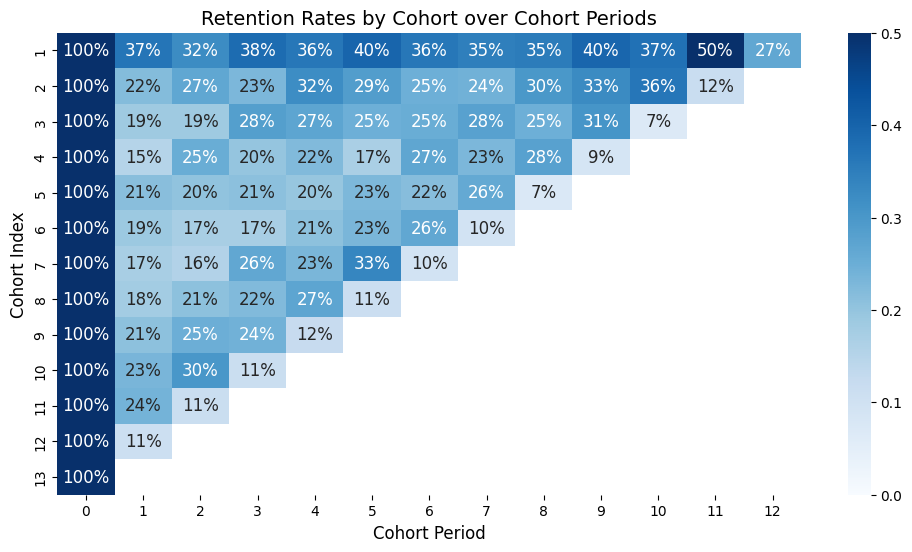

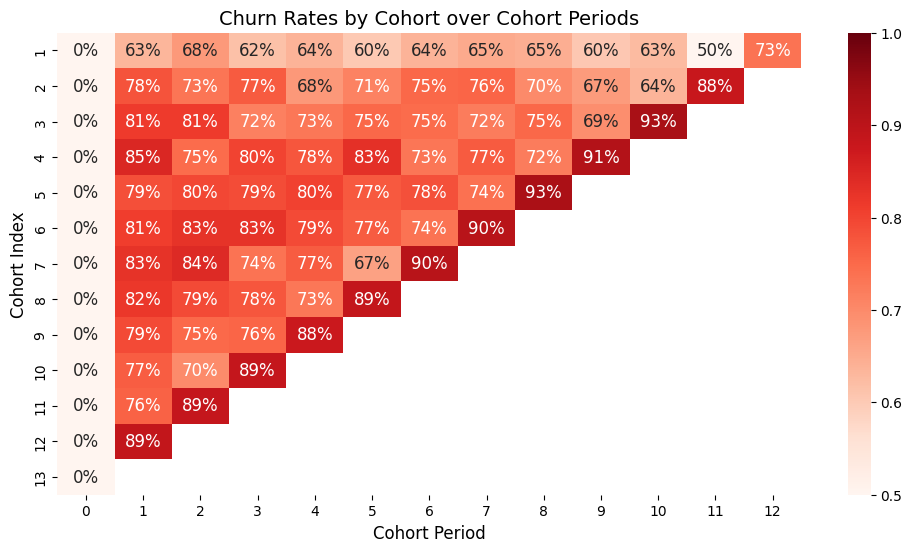

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Retention Rate Heatmap
plt.figure(figsize=(12, 6))
# sns.heatmap(retention_rates, annot=True, fmt='.0%', cmap='Blues')
sns.heatmap(retention_rates, annot=True, fmt='.0%', cmap='Blues', vmin=0, vmax=0.5, annot_kws={"size": 12})
plt.title('Retention Rates by Cohort over Cohort Periods', fontsize=14)
plt.ylabel('Cohort Index', fontsize=12)
plt.xlabel('Cohort Period', fontsize=12)
plt.show()

# Churn Rate Heatmap
plt.figure(figsize=(12, 6))
# sns.heatmap(churn_rates, annot=True, fmt='.0%', cmap='Reds')
sns.heatmap(churn_rates, annot=True, fmt='.0%', cmap='Reds', vmin=0.5, vmax=1, annot_kws={"size": 12})
plt.title('Churn Rates by Cohort over Cohort Periods', fontsize=14)
plt.ylabel('Cohort Index', fontsize=12)
plt.xlabel('Cohort Period',fontsize=12)
plt.show()

---
#### **Cohort Analysis of Repeat Rate / Churn Rate by Calendar Month**

In [ ]:
import numpy as np

# Define a function to right-align non-NaN values in a row
def right_align_row(row):
    # Filter out non-NaN values
    non_nan_values = row.dropna().values
    # Only perform right-alignment if there are non-NaN values
    if non_nan_values.size > 0:
        # Create a new row filled with NaNs, then insert the non-NaN values aligned to the right
        right_aligned = np.full(row.shape, np.nan)
        right_aligned[-len(non_nan_values):] = non_nan_values
        return pd.Series(right_aligned, index=row.index)
    # If all values are NaN, return the original row
    else:
        return row

# Apply the right-aligning function to each row of the DataFrame
right_aligned_df = retention_rates.apply(right_align_row, axis=1)
print(right_aligned_df)

# Calculate churn rates from the right-aligned retention rates
right_aligned_churn_rates = 1 - right_aligned_df
print(right_aligned_churn_rates)

CohortPeriod   0         1         2         3         4         5         6   \
CohortIndex                                                                     
1             1.0  0.366102  0.323164  0.384181  0.362712  0.397740  0.362712   
2             NaN  1.000000  0.220624  0.266187  0.230216  0.321343  0.287770   
3             NaN       NaN  1.000000  0.186842  0.186842  0.284211  0.271053   
4             NaN       NaN       NaN  1.000000  0.150442  0.252212  0.199115   
5             NaN       NaN       NaN       NaN  1.000000  0.213333  0.203333   
6             NaN       NaN       NaN       NaN       NaN  1.000000  0.190141   
7             NaN       NaN       NaN       NaN       NaN       NaN  1.000000   
8             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11            NaN       NaN 

In [ ]:
df['YearMonth'].unique()

array(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'], dtype=object)

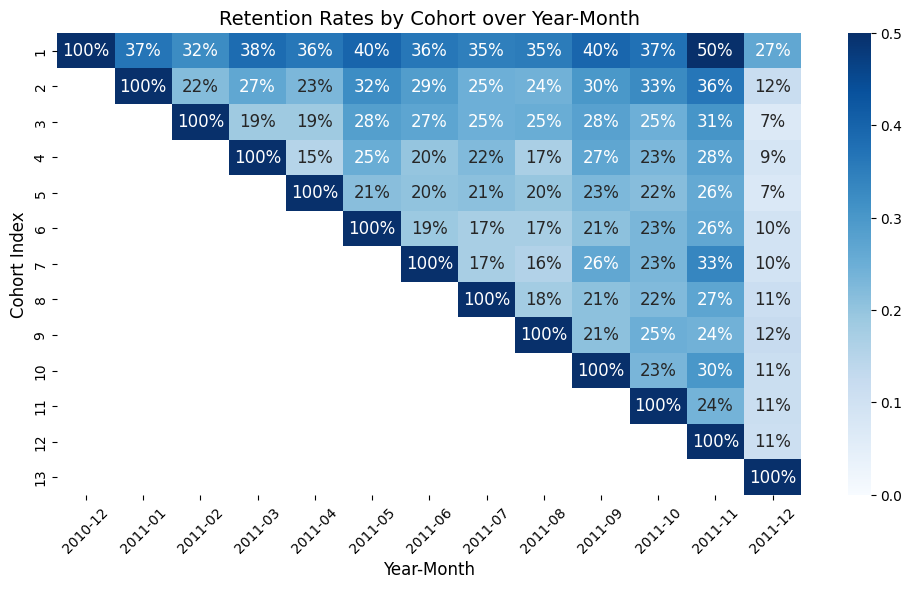

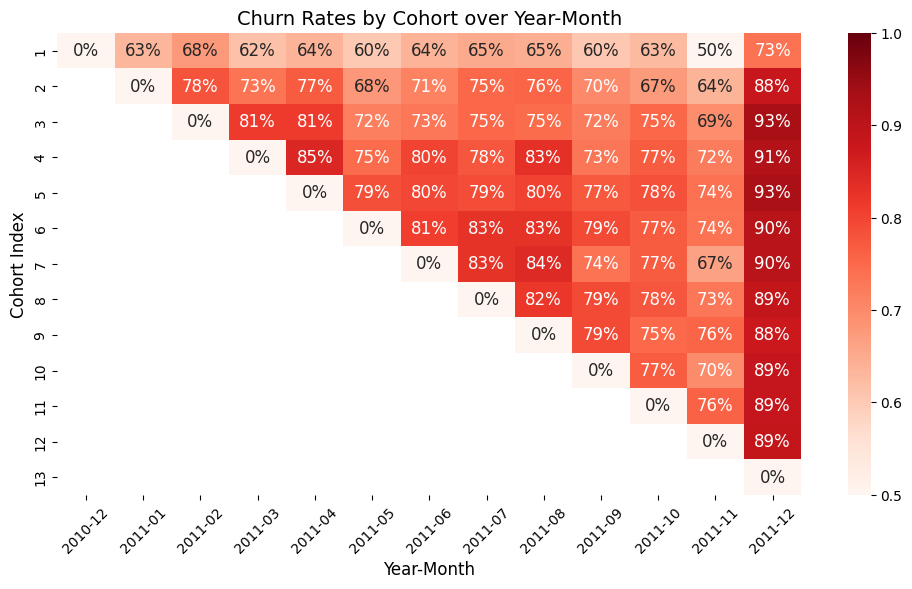

In [ ]:
month_labels = ['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12']

# [Retention]
plt.figure(figsize=(12, 6))
sns.heatmap(right_aligned_df, annot=True, fmt='.0%', cmap='Blues', vmin=0, vmax=0.5, annot_kws={"size": 12})
plt.title('Retention Rates by Cohort over Year-Month', fontsize=14)
plt.ylabel('Cohort Index', fontsize=12)
# positions = range(len(month_labels))
positions = np.arange(len(month_labels)) + 0.5
plt.xticks(positions, month_labels, rotation=45, fontsize=10)
plt.xlabel('Year-Month', fontsize=12)
plt.show()

# [Churn]
plt.figure(figsize=(12, 6))
sns.heatmap(right_aligned_churn_rates, annot=True, fmt='.0%', cmap='Reds', vmin=0.5, vmax=1, annot_kws={"size": 12})
plt.title('Churn Rates by Cohort over Year-Month', fontsize=14)
plt.ylabel('Cohort Index', fontsize=12)
positions = np.arange(len(month_labels)) + 0.5
plt.xticks(positions, month_labels, rotation=45, fontsize=10)
plt.xlabel('Year-Month', fontsize=12)
plt.show()

> ✅ When the heatmap was left-aligned using CohortPeriod on the x-axis, it was difficult to visually extract insights at a glance.
Noticed that all cohorts showed extremely high churn rates in their final CohortPeriod—likely due to the dataset ending—so decided to switch the x-axis from CohortPeriod to the actual Year-Month for clearer analysis.\
✅ When plotting the heatmap, manually adjusted vmin and vmax to better highlight color contrasts across values.

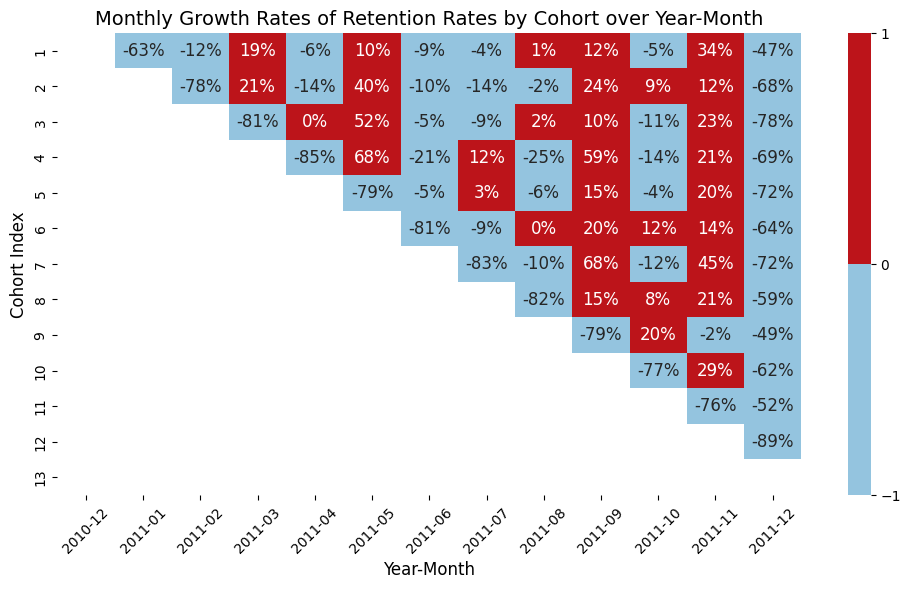

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Month-over-Month Growth Rate Calculation
change_rate_df = right_aligned_df.pct_change(axis=1)

colors = [plt.get_cmap('Blues')(0.4), "white", plt.get_cmap('Reds')(0.8)]
mymap = ListedColormap(colors)
mynorm = BoundaryNorm([-1, 0, 1], len(colors))

month_labels_2 = ['2010-12','2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12']

# Draw heatmap og Monthly Growth Rate of Retention Rates
plt.figure(figsize=(12, 6))
sns.heatmap(change_rate_df, annot=True, fmt=".0%", cmap=mymap, norm=mynorm, annot_kws={"size": 12})
positions = np.arange(len(month_labels_2)) + 0.5
plt.xticks(positions, month_labels_2, rotation=45, fontsize=10)
plt.title("Monthly Growth Rates of Retention Rates by Cohort over Year-Month", fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Cohort Index', fontsize=12)
plt.show()

In [ ]:
change_rate_df

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,NaN,-0.633898,-0.117284,0.188811,-0.055882,0.096573,-0.088068,-0.037383,0.012945,0.118211,-0.054286,0.344411,-0.471910
2,NaN,NaN,-0.779376,0.206522,-0.135135,0.395833,-0.104478,-0.141667,-0.019417,0.237624,0.088000,0.117647,-0.677632
3,NaN,NaN,NaN,-0.813158,0.000000,0.521127,-0.046296,-0.087379,0.021277,0.104167,-0.113208,0.234043,-0.775862
4,NaN,NaN,NaN,NaN,-0.849558,0.676471,-0.210526,0.122222,-0.247525,0.592105,-0.140496,0.211538,-0.690476
5,NaN,NaN,NaN,NaN,NaN,-0.786667,-0.046875,0.032787,-0.063492,0.152542,-0.044118,0.200000,-0.717949
6,NaN,NaN,NaN,NaN,NaN,NaN,-0.809859,-0.092593,0.000000,0.204082,0.118644,0.136364,-0.640000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.826446,-0.095238,0.684211,-0.125000,0.446429,-0.716049
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.819149,0.147059,0.076923,0.214286,-0.588235
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.792899,0.200000,-0.023810,-0.487805


---
#### **Cohort Analysis of Average Revenue per User (ARPU) by Cohort Period**

In [ ]:
df['Sales']=df['Quantity']*df['UnitPrice']

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,YearMonthOrder,CohortIndex,CohortPeriod,Sales
83506,543309,21232,STRAWBERRY CERAMIC TRINKET BOX,4,2011-02-07 12:05:00,1.25,18118.0,United Kingdom,2011-02,3,1,2,5.00
505810,579099,22580,ADVENT CALENDAR GINGHAM SACK,1,2011-11-28 11:26:00,5.95,15714.0,United Kingdom,2011-11,12,10,2,5.95
47369,540412,22507,MEMO BOARD RETROSPOT DESIGN,4,2011-01-07 10:27:00,4.95,13842.0,United Kingdom,2011-01,2,1,1,19.80
511150,579472,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,2,2011-11-29 15:09:00,0.39,13521.0,United Kingdom,2011-11,12,12,0,0.78
525880,580640,22400,MAGNETS PACK OF 4 HOME SWEET HOME,3,2011-12-05 12:51:00,0.39,16910.0,United Kingdom,2011-12,13,10,3,1.17


In [ ]:
cohort_data_sales = df.groupby(['CohortIndex', 'CohortPeriod']) \
                .agg(sum_sales=('Sales', 'sum')) \
                .reset_index()

cohort_sales = cohort_data_sales.pivot(index='CohortIndex', columns='CohortPeriod', values='sum_sales')
cohort_sales

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,572713.890,276237.69,233845.37,303119.39,204407.66,336627.50,314162.61,310783.92,331749.220,472813.64,456080.61,513803.59,185803.13
2,293207.350,55149.91,63268.17,71587.40,81114.09,84583.78,70107.40,72689.71,72023.651,111803.90,123882.10,26464.82,NaN
3,158142.070,29043.24,41134.38,48238.86,40147.91,34223.23,49706.63,62450.83,55380.060,64809.45,10600.22,NaN,NaN
4,200069.960,30059.43,59057.51,42816.61,51657.33,40020.81,64919.49,71023.95,71265.830,12868.02,NaN,NaN,NaN
5,122011.491,29452.82,25077.07,24311.47,26314.19,30206.30,28668.98,34228.61,6350.100,NaN,NaN,NaN,NaN
6,124103.780,18682.76,20193.76,19162.17,27861.87,32976.60,33312.91,179251.53,NaN,NaN,NaN,NaN,NaN
7,135742.950,14805.15,14155.40,30961.59,26754.54,42808.25,8227.35,NaN,NaN,NaN,NaN,NaN,NaN
8,74008.751,11789.67,15534.18,17551.47,19512.11,6072.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,79756.100,20962.93,35503.90,44541.76,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_data_popul = df.groupby(['CohortIndex', 'CohortPeriod']) \
                .agg(n_customers=('CustomerID', 'nunique')) \
                .reset_index()

cohort_popul = cohort_data_popul.pivot(index='CohortIndex', columns='CohortPeriod', values='n_customers')
cohort_popul

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
3,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
4,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
5,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
6,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
7,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
8,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_sales_by_popul = cohort_sales/cohort_popul
cohort_sales_by_popul

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,647.134339,852.585463,817.641154,891.527618,636.783988,956.328125,978.699720,1005.773204,1059.901661,1350.896114,1377.887039,1154.614809,790.651617
2,703.135132,599.455543,569.983514,745.702083,605.329030,704.864833,680.654369,719.700099,576.189208,822.087500,815.013816,540.098367,NaN
3,416.163342,409.059718,579.357465,446.656111,389.785534,364.076915,517.777396,589.158774,589.149574,558.702155,407.700769,NaN,NaN
4,442.632655,442.050441,518.048333,475.740111,511.458713,526.589605,536.524711,682.922596,565.601825,329.949231,NaN,NaN,NaN
5,406.704970,460.200312,411.099508,385.896349,446.003220,444.210294,441.061231,438.828333,288.640909,NaN,NaN,NaN,NaN
6,436.985141,345.977037,412.117551,391.064694,472.235085,499.645455,444.172133,6638.945556,NaN,NaN,NaN,NaN,NaN
7,560.921281,352.503571,372.510526,483.774844,477.759643,528.496914,357.710870,NaN,NaN,NaN,NaN,NaN,NaN
8,393.663569,346.755000,398.312308,417.892143,382.590392,289.150476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,471.929586,598.940857,845.330952,1086.384390,727.826667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


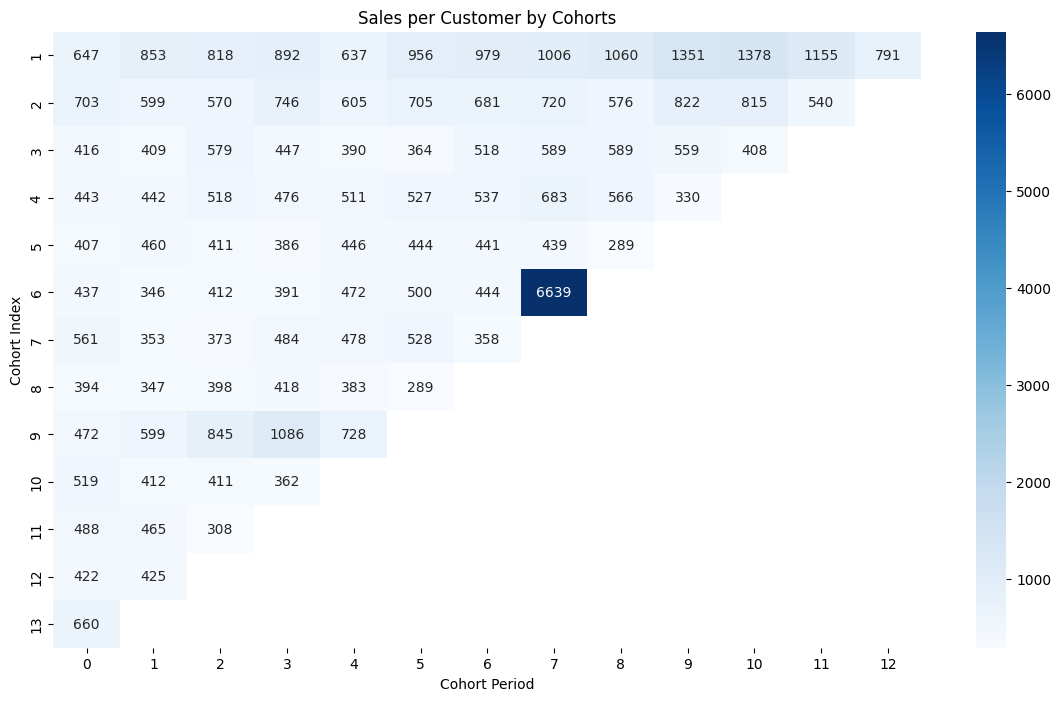

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(cohort_sales_by_popul, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales per Customer by Cohorts')
plt.ylabel('Cohort Index')
plt.xlabel('Cohort Period')
plt.show()

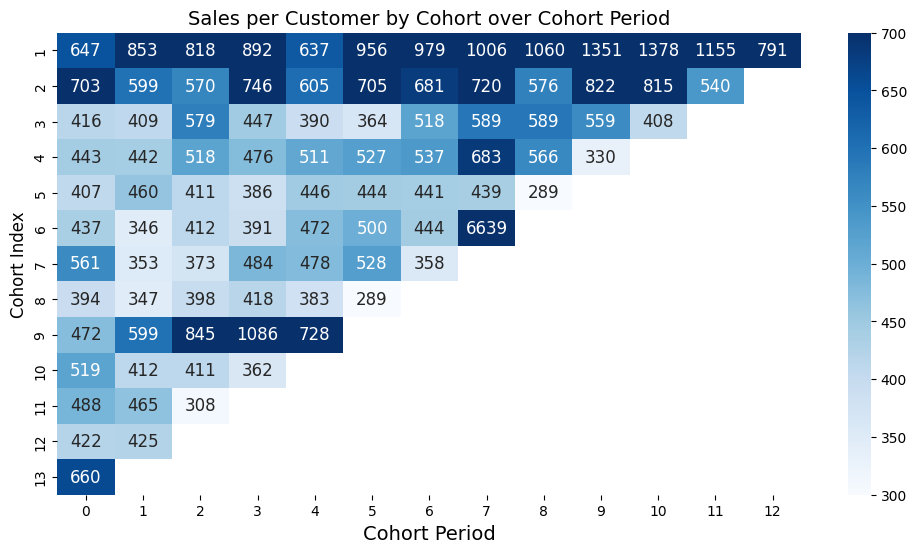

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_sales_by_popul, annot=True, fmt='.0f', cmap='Blues', vmin=300, vmax=700, annot_kws={"size": 12})
plt.title('Sales per Customer by Cohort over Cohort Period', fontsize=14)
plt.ylabel('Cohort Index', fontsize=12)
plt.xlabel('Cohort Period', fontsize=14)
plt.show()

---
#### **Cohort Analysis of Average Revenue per User (ARPU) by Calendar Month**

In [ ]:
right_aligned_sales = cohort_sales_by_popul.apply(right_align_row, axis=1)
right_aligned_sales

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortIndex,,,,,,,,,,,,,
1,647.134339,852.585463,817.641154,891.527618,636.783988,956.328125,978.699720,1005.773204,1059.901661,1350.896114,1377.887039,1154.614809,790.651617
2,NaN,703.135132,599.455543,569.983514,745.702083,605.329030,704.864833,680.654369,719.700099,576.189208,822.087500,815.013816,540.098367
3,NaN,NaN,416.163342,409.059718,579.357465,446.656111,389.785534,364.076915,517.777396,589.158774,589.149574,558.702155,407.700769
4,NaN,NaN,NaN,442.632655,442.050441,518.048333,475.740111,511.458713,526.589605,536.524711,682.922596,565.601825,329.949231
5,NaN,NaN,NaN,NaN,406.704970,460.200312,411.099508,385.896349,446.003220,444.210294,441.061231,438.828333,288.640909
6,NaN,NaN,NaN,NaN,NaN,436.985141,345.977037,412.117551,391.064694,472.235085,499.645455,444.172133,6638.945556
7,NaN,NaN,NaN,NaN,NaN,NaN,560.921281,352.503571,372.510526,483.774844,477.759643,528.496914,357.710870
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.663569,346.755000,398.312308,417.892143,382.590392,289.150476
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.929586,598.940857,845.330952,1086.384390,727.826667


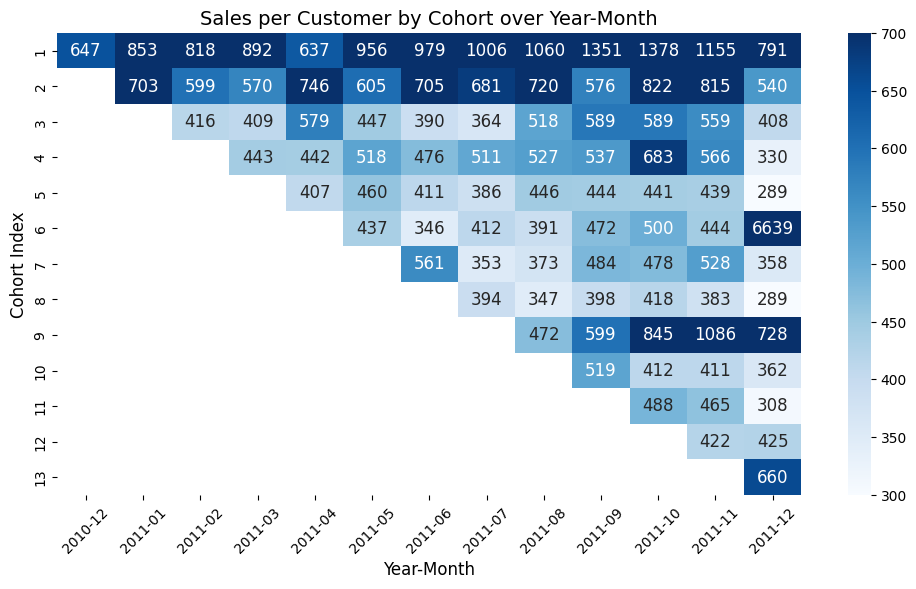

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(right_aligned_sales, annot=True, fmt='.0f', cmap='Blues', vmin=300, vmax=700, annot_kws={"size": 12})
plt.title('Sales per Customer by Cohort over Year-Month', fontsize=14)
plt.ylabel('Cohort Index', fontsize=12)
positions = np.arange(len(month_labels)) + 0.5
plt.xticks(positions, month_labels, rotation=45, fontsize=10)
plt.xlabel('Year-Month', fontsize=12)
plt.show()

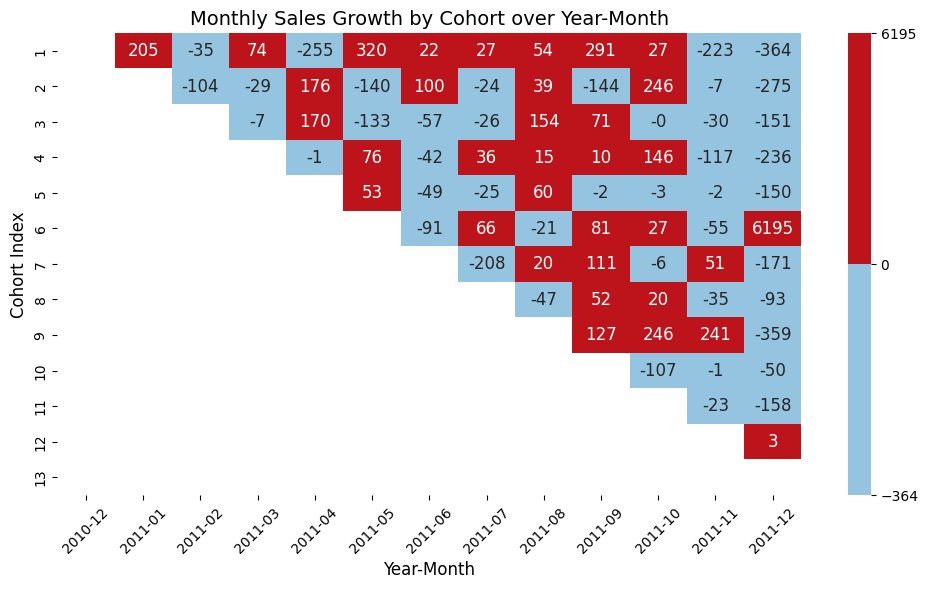

In [ ]:
sales_growth = right_aligned_sales.diff(axis=1)

colors = [plt.get_cmap('Blues')(0.4), "white", plt.get_cmap('Reds')(0.8)]  # 음수는 파란색, 0은 흰색, 양수는 빨간색
mymap = ListedColormap(colors)
mynorm = BoundaryNorm([sales_growth.min().min(), 0, sales_growth.max().max()], len(colors))

plt.figure(figsize=(12, 6))
sns.heatmap(sales_growth, annot=True, cmap=mymap, norm=mynorm, fmt=".0f", annot_kws={"size": 12})
plt.title('Monthly Sales Growth by Cohort over Year-Month', fontsize=14)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Cohort Index',fontsize=12)
plt.xticks(positions, month_labels, rotation=45, fontsize=10)
plt.show()

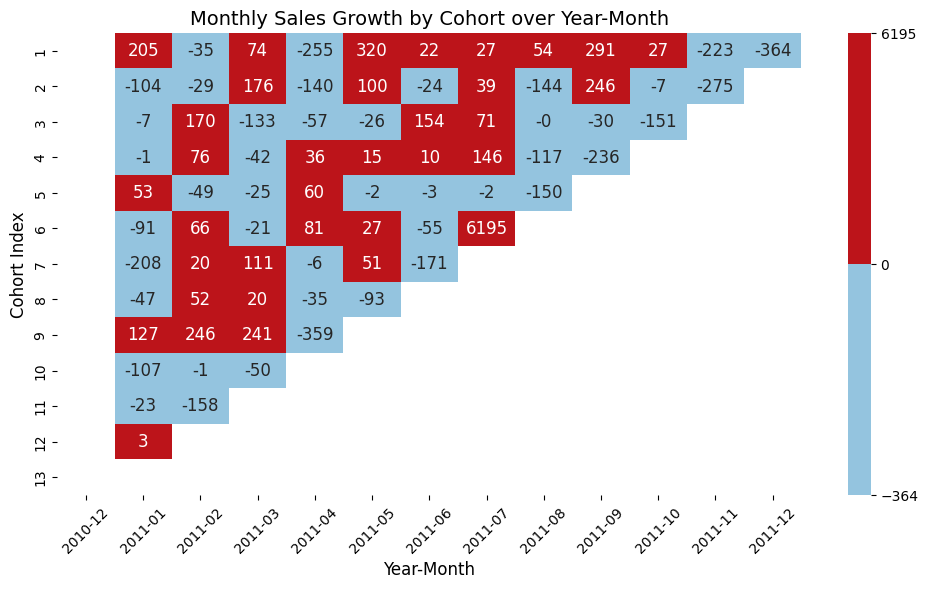

In [ ]:
sales_growth = cohort_sales_by_popul.diff(axis=1)

colors = [plt.get_cmap('Blues')(0.4), "white", plt.get_cmap('Reds')(0.8)]  # 음수는 파란색, 0은 흰색, 양수는 빨간색
mymap = ListedColormap(colors)
mynorm = BoundaryNorm([sales_growth.min().min(), 0, sales_growth.max().max()], len(colors))

plt.figure(figsize=(12, 6))
sns.heatmap(sales_growth, annot=True, cmap=mymap, norm=mynorm, fmt=".0f", annot_kws={"size": 12})
plt.title('Monthly Sales Growth by Cohort over Year-Month', fontsize=14)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Cohort Index',fontsize=12)
plt.xticks(positions, month_labels, rotation=45, fontsize=10)
plt.show()

---
#### **Customer-Level Revenue Analysis by Cohort Period for Cohort 9**

In [ ]:
df_cohort9 = df[df['CohortIndex']==9]
df_cohort9

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,YearMonthOrder,CohortIndex,CohortPeriod,Sales
285421,561904,22075,6 RIBBONS ELEGANT CHRISTMAS,96,2011-08-01 08:30:00,1.45,17941.0,United Kingdom,2011-08,9,9,0,139.20
285422,561904,85049E,SCANDINAVIAN REDS RIBBONS,156,2011-08-01 08:30:00,1.06,17941.0,United Kingdom,2011-08,9,9,0,165.36
285423,561905,21385,IVORY HANGING DECORATION HEART,24,2011-08-01 09:31:00,0.85,14947.0,United Kingdom,2011-08,9,9,0,20.40
285424,561905,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2011-08-01 09:31:00,0.95,14947.0,United Kingdom,2011-08,9,9,0,11.40
285425,561905,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2011-08-01 09:31:00,0.85,14947.0,United Kingdom,2011-08,9,9,0,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,13,9,4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,13,9,4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,13,9,4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,13,9,4,16.60


In [ ]:
cohort9_sales = df_cohort9.groupby(['CustomerID','CohortPeriod'])\
                .agg(sum_sales=('Sales', 'sum'))\
                .reset_index()
cohort9_sales

,CustomerID,CohortPeriod,sum_sales
0,12364.0,0,623.92
1,12364.0,1,79.80
2,12364.0,2,299.06
3,12364.0,4,310.32
4,12378.0,0,4008.62
...,...,...,...
303,18167.0,0,498.48
304,18167.0,3,886.38
305,18200.0,0,163.80
306,18282.0,0,100.21


In [ ]:
cohort9_sales_pivot = cohort9_sales.pivot(index='CustomerID',columns='CohortPeriod',values='sum_sales')
cohort9_sales_pivot

CohortPeriod,0,1,2,3,4
CustomerID,,,,,
12364.0,623.92,79.8,299.06,NaN,310.32
12378.0,4008.62,NaN,NaN,NaN,NaN
12381.0,1268.74,NaN,10.50,419.06,147.01
12384.0,292.69,NaN,NaN,292.58,NaN
12418.0,668.58,NaN,NaN,NaN,NaN
...,...,...,...,...,...
18099.0,168.31,NaN,NaN,NaN,NaN
18147.0,98.88,NaN,80.46,NaN,NaN
18167.0,498.48,NaN,NaN,886.38,NaN


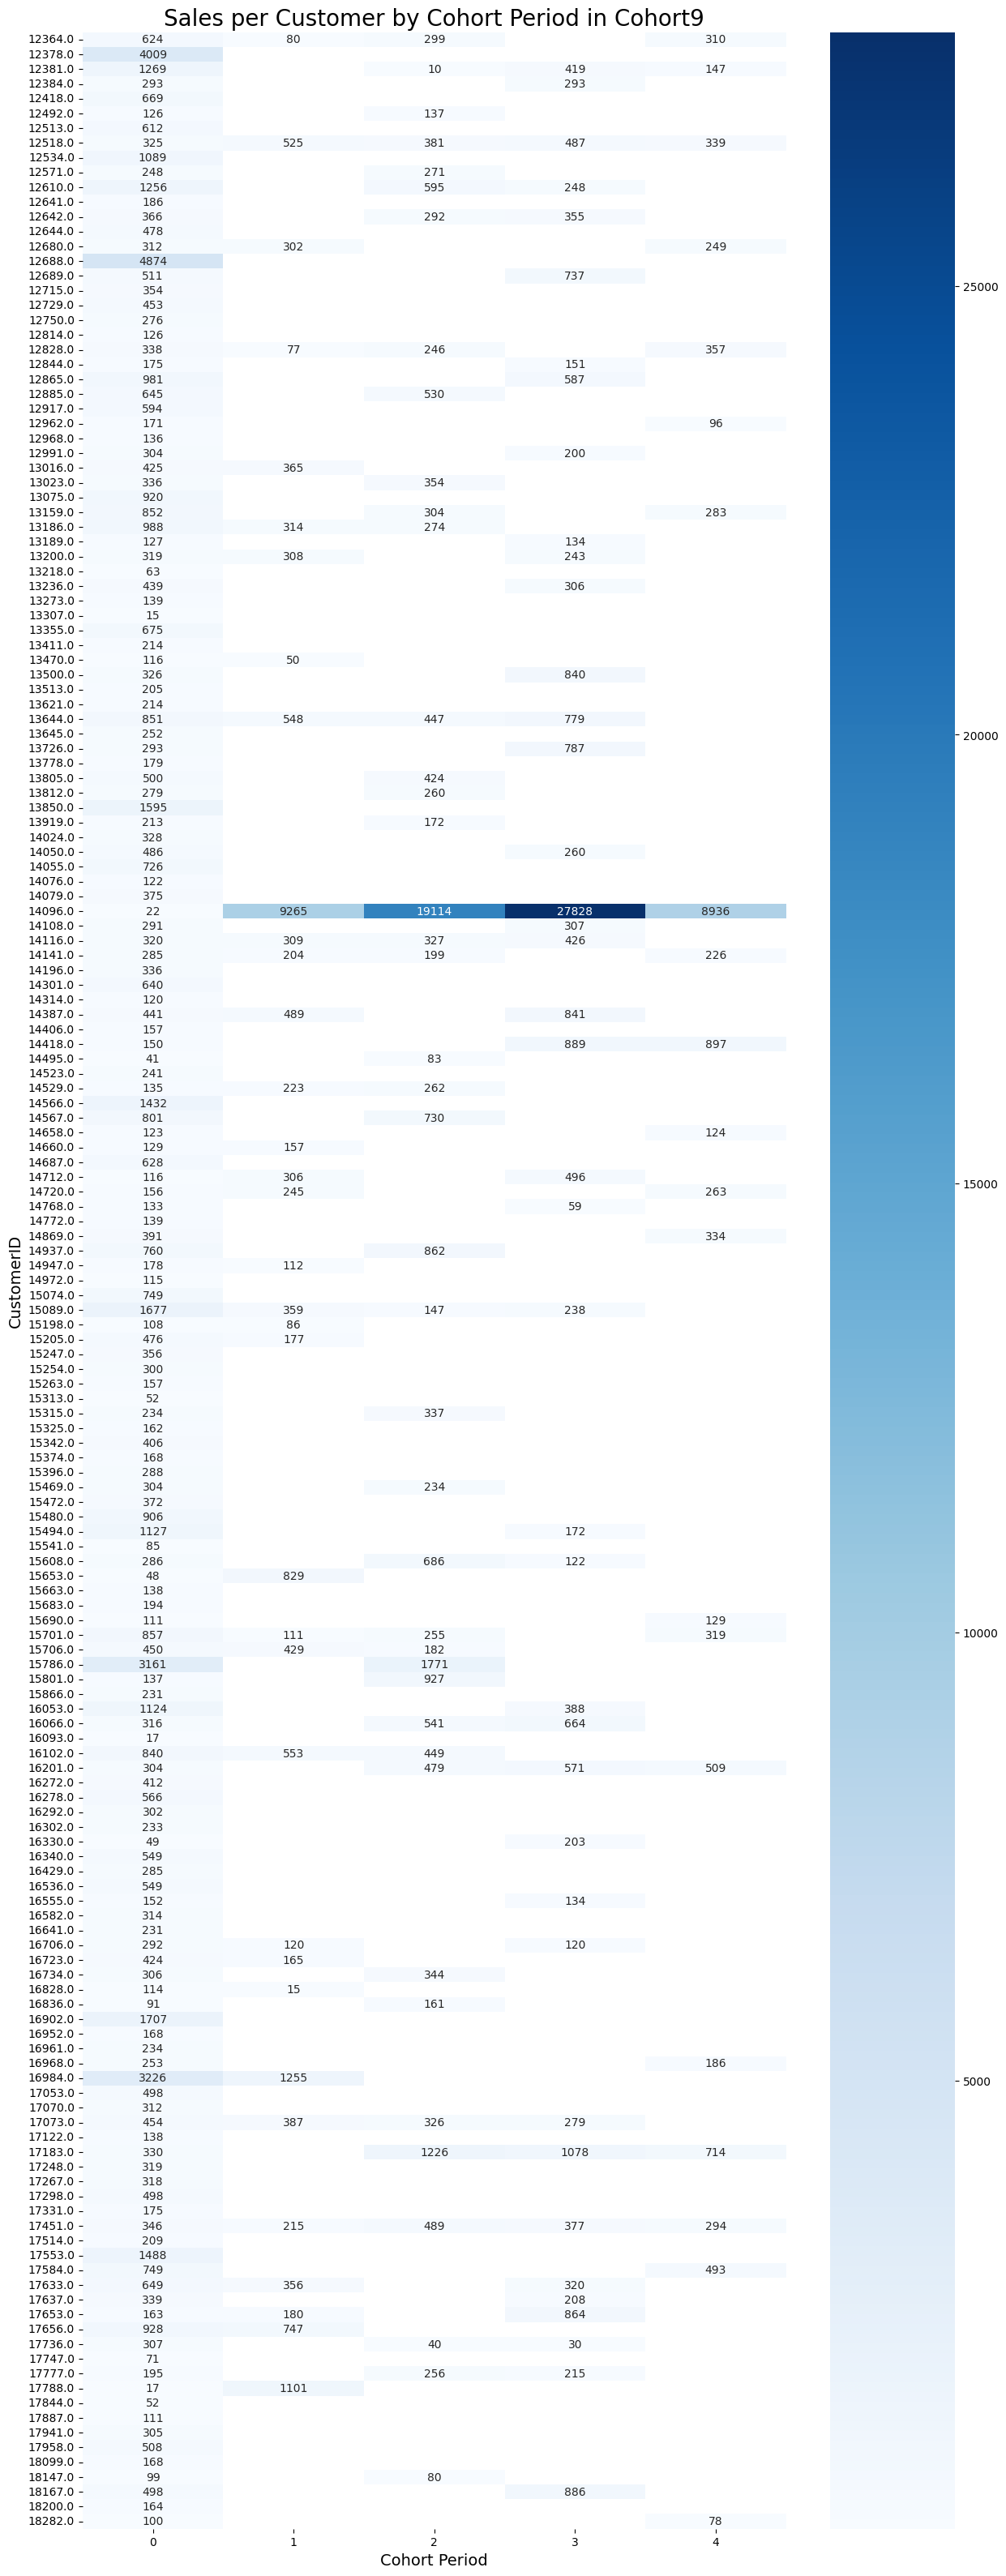

In [ ]:
plt.figure(figsize=(14, 40))
sns.heatmap(cohort9_sales_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales per Customer by Cohort Period in Cohort9', fontsize=20)
# ax.set_yticklabels(ax.get_yticks().astype(int), rotation=0)
plt.ylabel('CustomerID', fontsize=14)
plt.xlabel('Cohort Period',fontsize=14)
plt.show()

> ✅ The ARPU chart for Cohort 9 was particularly interesting, so I calculated customer-level revenue by cohort period within that group.
The result revealed that CustomerID = 14096 had overwhelmingly higher revenue than others.\
This suggests that the high overall revenue in Cohort 9 is not due to generally high customer loyalty, but rather driven by a small number of VIP customers.\
➡ This highlights the importance of combining cohort-level and individual-level customer analysis.